In [119]:
import pandas as pd
import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pykalman import KalmanFilter

In [140]:
path_to_data = 'E:/4 семестр/ГПО/РПАС/Данные СТМ Восточный Купол (от 29.01.17)/Куст 201/Скважина 2012.xlsx'

In [141]:
def get_df(path):
    df = pd.read_excel(path)
    df.rename(columns = {'Unnamed: 0' : 'Time Moment'}, inplace = True)
    df = df.drop(labels = [0], axis = 0) # удалить вторую строку оглавления
    df=df.dropna()
    return df

In [142]:
# вывести 4 графика зависимости значений столбца относительно времени (по графику на столбец)
def draw_4_graphs(df1,df2):
    plt.figure(figsize=(22, 20))
    
    columns = list(df.columns[1:])
    i=2
    for col in columns:
        plt.subplot(4, 1, i-1)
        plt.plot(df1 ,'b', label='Оригинальный сигнал')
        plt.plot(df2 ,'r', label='kalman-выход фильтра')
        plt.xlabel('Time Moment')
        plt.ylabel(col)
        plt.title(col)

    plt.show()

In [143]:
def data_processing(df):
    columns = list(df.columns[1:])
    for col in columns:
        signal = df.loc[:, col]
        measurements = signal
        kf = KalmanFilter(transition_matrices=[1] ,# A матрица перехода состояний между временами t и t+1 
                  observation_matrices=[1],# C матрица наблюдения
                  initial_state_mean=measurements[1],#среднее начальное состояние
                  initial_state_covariance=[1],#ковариация начального состояния распределение
                  observation_covariance=[1],# R ковариационная матрица наблюдения 
                  transition_covariance= 0.01) # Q ковариационная матрица перехода состояний 
        state_means, state_covariances = kf.filter(measurements)#среднее  начальное, начальная ковариация
        state_means=[w[0] for w in state_means]
        state_std = sqrt(state_covariances[:,0])
        draw_4_graphs(measurements, state_means)
    return df

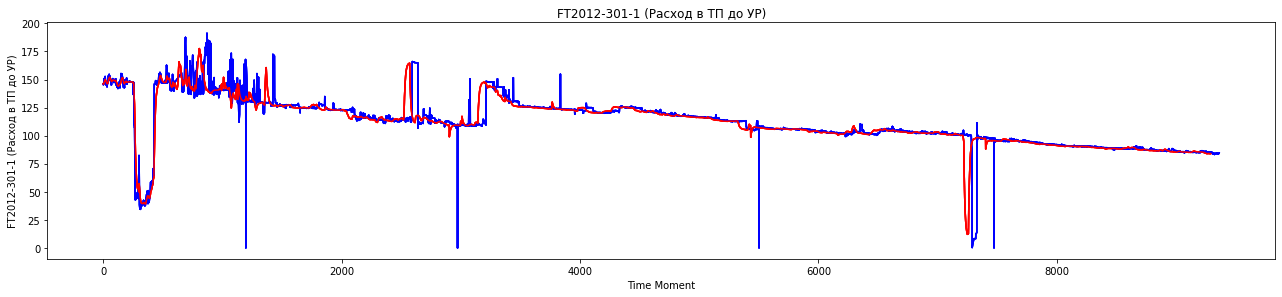

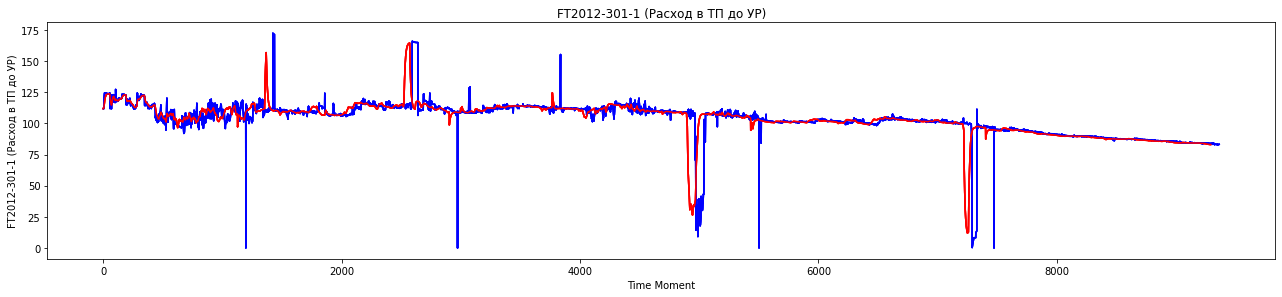

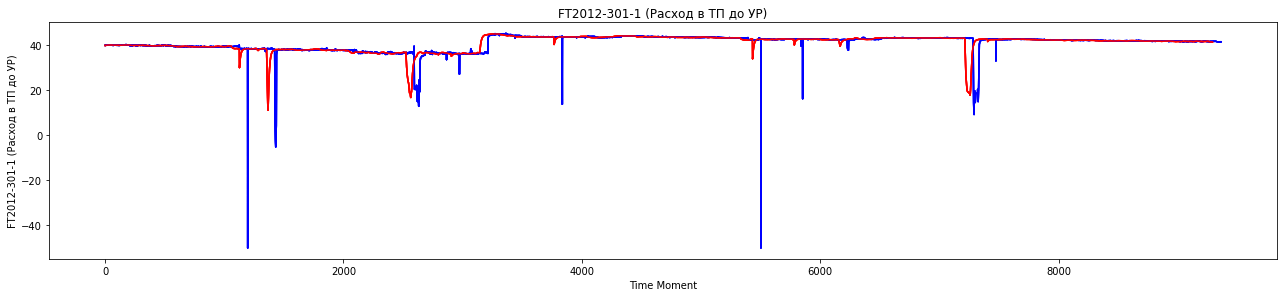

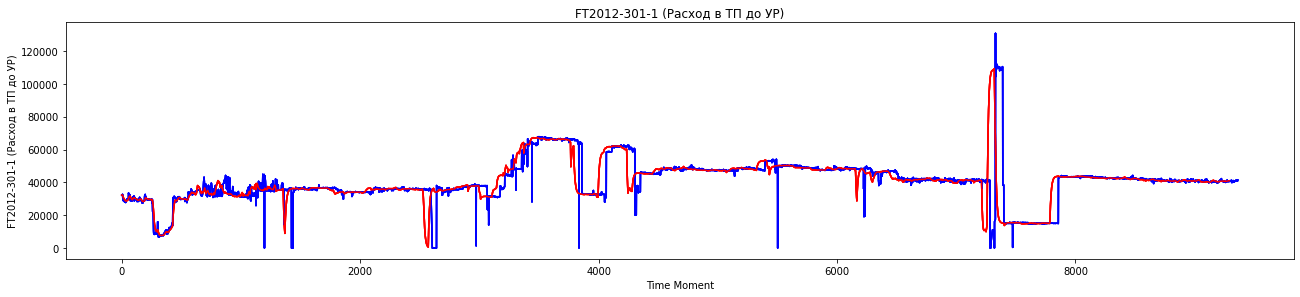

,Time Moment,PT2012-202 (Давление до УР),PT2012-204 (Давление после УР),TT2012-101 (Температура в ТП до УР),FT2012-301-1 (Расход в ТП до УР)
1,2014-12-11 00:00:00,146.2733,111.947098,39.711609,32315.130859
2,2014-12-11 02:00:00,145.293701,111.9814,39.677269,32078.419922
3,2014-12-11 04:00:00,145.352493,112.089203,39.708172,32091.519531
4,2014-12-11 06:00:00,145.778595,112.196899,39.732201,32158.820312
5,2014-12-11 08:00:00,146.890503,112.250801,39.732201,32426.269531
...,...,...,...,...,...
9357,2017-01-28 16:00:00,84.037491,82.950104,41.205078,40999.691406
9358,2017-01-28 18:00:00,84.013,82.945213,41.108952,40969.960938
9359,2017-01-28 20:00:00,84.228523,83.11174,41.15015,40809.53125
9360,2017-01-28 22:00:00,84.370567,83.13623,41.187908,41051.210938


In [144]:
df=get_df(path_to_data)
data_processing(df)

In [82]:

df = pd.read_excel('E:/4 семестр/ГПО/РПАС/Данные СТМ Восточный Купол (от 29.01.17)/Куст 201/Скважина 2011.xlsx')
df=df.dropna()
signal = df.loc[:, 'PT2011-202 (Давление до УР)']
measurements = signal
print(measurements)
kf = KalmanFilter(transition_matrices=[1] ,# A матрица перехода состояний между временами t и t+1 
                  observation_matrices=[1],# C матрица наблюдения
                  initial_state_mean=measurements[1],#среднее начальное состояние
                  initial_state_covariance=[1],#ковариация начального состояния распределение
                  observation_covariance=[1],# R ковариационная матрица наблюдения 
                  transition_covariance= 0.01) # Q ковариационная матрица перехода состояний 
state_means, state_covariances = kf.filter(measurements)#среднее  начальное, начальная ковариация
state_means=[w[0] for w in state_means]
state_std = sqrt(state_covariances[:,0])



fig, ax = subplots(figsize=(8,4))
ax.plot(measurements ,'b', label='Оригинальный сигнал')
ax.plot(state_means ,'r', label='kalman-выход фильтра')
ax.legend()
ax.set_title('Удаление высокочастотного шума с помощью  фильтра Калмана\n (библиотека pyKalman)', fontsize=14)                                          
ax.set_ylabel('Амплитуда сигнала', fontsize=12)
ax.set_xlabel('Время', fontsize=12)
wavelet = 'cmor1-0.5' 



0            Value
1       116.536697
2       115.591301
3       115.929298
4       116.546501
           ...    
9357     82.166397
9358     82.132118
9359     82.318237
9360     82.337837
9361     82.401512
Name: PT2011-202 (Давление до УР), Length: 9293, dtype: object


TypeError: unsupported operand type(s) for -: 'str' and 'float'

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pykalman import KalmanFilter

df = pd.read_excel('E:/4 семестр/ГПО/РПАС/Данные СТМ Восточный Купол (от 29.01.17)/Куст 201/Скважина 2011.xlsx')
df=df.dropna()
signal = df.loc[:, 'PT2011-204 (Давление после УР)']
measurements = signal
kf = KalmanFilter(transition_matrices=[1] ,# A матрица перехода состояний между временами t и t+1 
                  observation_matrices=[1],# C матрица наблюдения
                  initial_state_mean=measurements[0],#среднее начальное состояние
                  initial_state_covariance=[1],#ковариация начального состояния распределение
                  observation_covariance=[1],# R ковариационная матрица наблюдения 
                  transition_covariance= 0.01) # Q ковариационная матрица перехода состояний 
state_means, state_covariances = kf.filter(measurements)#среднее  начальное, начальная ковариация
state_means=[w[0] for w in state_means]
state_std = sqrt(state_covariances[:,0])
fig, ax = subplots(figsize=(8,4))
ax.plot(measurements ,'b', label='Оригинальный сигнал')
ax.plot(state_means ,'r', label='kalman-выход фильтра')
ax.legend()
ax.set_title('Удаление высокочастотного шума с помощью  фильтра Калмана\n (библиотека pyKalman)', fontsize=14)                                          
ax.set_ylabel('Амплитуда сигнала', fontsize=12)
ax.set_xlabel('Время', fontsize=12)
wavelet = 'cmor1-0.5' 

ValueError: could not convert string to float: 'Value'

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pykalman import KalmanFilter

df = pd.read_excel('E:/4 семестр/ГПО/РПАС/Данные СТМ Восточный Купол (от 29.01.17)/Куст 201/Скважина 2011.xlsx')
df=df.dropna()
signal = df.loc[:, 'TT2011-101 (Температура в ТП до УР)']
measurements = signal
kf = KalmanFilter(transition_matrices=[1] ,# A матрица перехода состояний между временами t и t+1 
                  observation_matrices=[1],# C матрица наблюдения
                  initial_state_mean=measurements[0],#среднее начальное состояние
                  initial_state_covariance=[1],#ковариация начального состояния распределение
                  observation_covariance=[1],# R ковариационная матрица наблюдения 
                  transition_covariance= 0.01) # Q ковариационная матрица перехода состояний 
state_means, state_covariances = kf.filter(measurements)#среднее  начальное, начальная ковариация
state_means=[w[0] for w in state_means]
state_std = sqrt(state_covariances[:,0])
fig, ax = subplots(figsize=(8,4))
ax.plot(measurements ,'b', label='Оригинальный сигнал')
ax.plot(state_means ,'r', label='kalman-выход фильтра')
ax.legend()
ax.set_title('Удаление высокочастотного шума с помощью  фильтра Калмана\n (библиотека pyKalman)', fontsize=14)                                          
ax.set_ylabel('Амплитуда сигнала', fontsize=12)
ax.set_xlabel('Время', fontsize=12)
wavelet = 'cmor1-0.5' 

ValueError: could not convert string to float: 'Value'